In [123]:
import pandas

from datetime import datetime, timedelta
from matplotlib import pyplot

In [167]:
cpu_df = pandas.read_csv("../exclusive-dilep/scaling_cpu_bound_1e9.csv")
cpu_df = pandas.read_csv("../exclusive-dilep/scaling_cpu_bound_1e9-taskid.csv")

network_df = pandas.read_csv("../exclusive-dilep/scaling_network_bound_3.csv")
cpu_df

,measurementID,version,lang,startTime,uuid,newcontainer,vmuptime,platform,containerID,functionName,...,contextSwitches,frameworkRuntime,taskID,runtime,endTime,network_rx_bytes.lo,network_rx_bytes.vtarget_1,network_rx_bytes.telemetry1_sb,network_rx_bytes.vinternal_1,partitions
0,0,0.5,python,1639471304678,5d527463-c174-465b-9bff-3342f572e51a,1,1639467691,AWS Lambda,2021/12/14/[$LATEST]ad34aa25b6344860821574f0e8...,root_lambda,...,39795,90,8788809891181,90,1639471304768,13275,0,176,110,512
1,1,0.5,python,1639471305769,5d527463-c174-465b-9bff-3342f572e51a,0,1639467691,AWS Lambda,2021/12/14/[$LATEST]ad34aa25b6344860821574f0e8...,root_lambda,...,40417,99,8788809891181,99,1639471305868,13275,0,176,110,512
2,2,0.5,python,1639471306870,5d527463-c174-465b-9bff-3342f572e51a,0,1639467691,AWS Lambda,2021/12/14/[$LATEST]ad34aa25b6344860821574f0e8...,root_lambda,...,40604,94,8788809891181,94,1639471306964,13275,0,176,110,512
3,3,0.5,python,1639471307965,5d527463-c174-465b-9bff-3342f572e51a,0,1639467691,AWS Lambda,2021/12/14/[$LATEST]ad34aa25b6344860821574f0e8...,root_lambda,...,40972,86,8788809891181,86,1639471308051,13275,0,176,110,512
4,4,0.5,python,1639471309053,5d527463-c174-465b-9bff-3342f572e51a,0,1639467691,AWS Lambda,2021/12/14/[$LATEST]ad34aa25b6344860821574f0e8...,root_lambda,...,41260,91,8788809891181,91,1639471309144,13275,0,176,110,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27905,153,0.5,python,1639471768775,74436aff-bb2f-435c-9002-915452c713fd,0,1639467712,AWS Lambda,2021/12/14/[$LATEST]907d2565f8e240b59c96c81a9d...,root_lambda,...,123754,158,8737285299716,158,1639471768933,238573,0,90,29836,32
27906,154,0.5,python,1639471769934,74436aff-bb2f-435c-9002-915452c713fd,0,1639467712,AWS Lambda,2021/12/14/[$LATEST]907d2565f8e240b59c96c81a9d...,root_lambda,...,124040,139,8737285299716,139,1639471770073,238573,0,90,29836,32
27907,155,0.5,python,1639471771074,74436aff-bb2f-435c-9002-915452c713fd,0,1639467712,AWS Lambda,2021/12/14/[$LATEST]907d2565f8e240b59c96c81a9d...,root_lambda,...,124313,142,8737285299716,142,1639471771216,238573,0,90,29836,32
27908,156,0.5,python,1639471772217,74436aff-bb2f-435c-9002-915452c713fd,0,1639467712,AWS Lambda,2021/12/14/[$LATEST]907d2565f8e240b59c96c81a9d...,root_lambda,...,124608,154,8737285299716,154,1639471772371,238573,0,90,29836,32


In [168]:
start_timestamp = df["startTime"].min() / 1000
end_timestamp = df["endTime"].max() / 1000
start_datetime = datetime.fromtimestamp(start_timestamp)
end_datetime = datetime.fromtimestamp(end_timestamp)

print(start_datetime)
print(end_datetime)

2021-12-11 12:17:29.265000
2021-12-11 12:18:22.926000


In [175]:
partitions=512
reduced_cpu_df= cpu_df[cpu_df["partitions"]==partitions]
reduced_network_df= network_df[network_df["partitions"]==partitions]

# df = eight_df

In [176]:
help_me_array_cpu=reduced_cpu_df.groupby("taskID").min("startTime").sort_values(by="startTime").index
help_me_array_network=reduced_network_df.groupby("uuid").min("startTime").sort_values(by="startTime").index

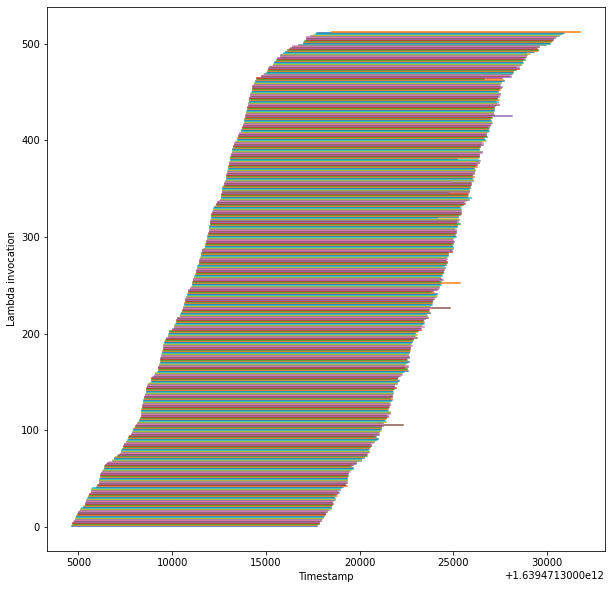

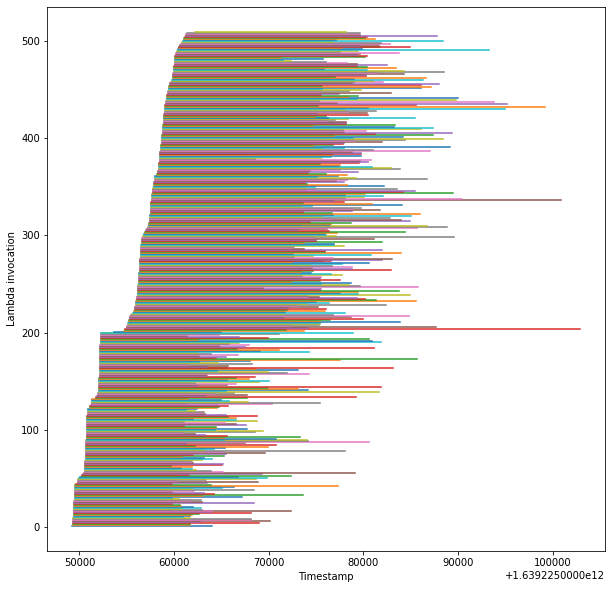

In [177]:
pyplot.figure(figsize=(10,10))
# for number, (label, lambdadf) in enumerate(df.sort_values(by="startTime").groupby("uuid")):
for number, uuid in enumerate(help_me_array_cpu):
    pyplot.plot(reduced_cpu_df[reduced_cpu_df["taskID"]==uuid].groupby("startTime")["measurementID"].count()+ number)
pyplot.xlabel("Timestamp")
pyplot.ylabel("Lambda invocation")
pyplot.savefig(f'cpu_time_intervals_plot_{partitions}.pdf')  

pyplot.figure(figsize=(10,10))
# for number, (label, lambdadf) in enumerate(df.sort_values(by="startTime").groupby("uuid")):
for number, uuid in enumerate(help_me_array_network):
    pyplot.plot(reduced_network_df[reduced_network_df["uuid"]==uuid].groupby("startTime")["measurementID"].count()+ number)
pyplot.xlabel("Timestamp")
pyplot.ylabel("Lambda invocation")
pyplot.savefig(f'network_time_intervals_plot_{partitions}.pdf')  


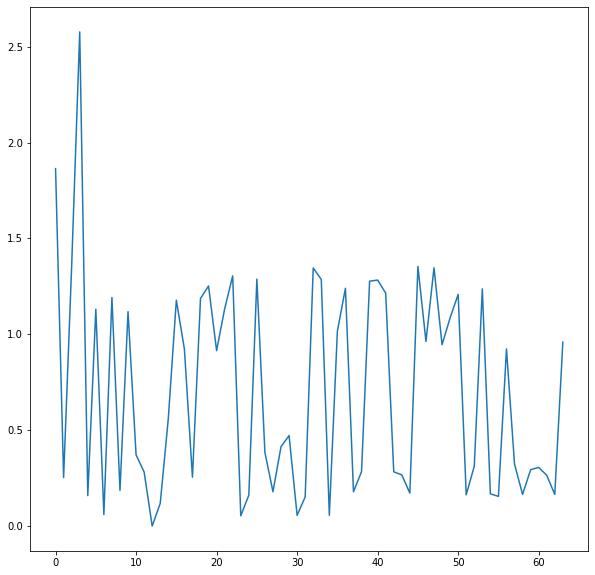

In [17]:
minstartdf = df.groupby('uuid')[["startTime"]].min().reset_index()
minstartdf["startTime"] = minstartdf["startTime"] / 1000

pyplot.figure(figsize=(10,10))
pyplot.plot(minstartdf.index, minstartdf["startTime"]-minstartdf["startTime"].min())

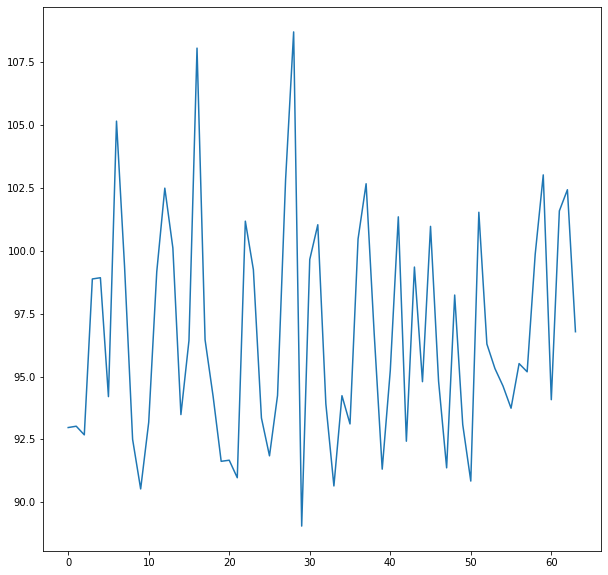

In [18]:
runtimedf = df.groupby('uuid')[["startTime","endTime"]].agg(minstart=("startTime","min"),maxend=("endTime","max")).reset_index()
runtimedf["runtime"] = (runtimedf["maxend"] - runtimedf["minstart"]) / 1000
runtimedf

pyplot.figure(figsize=(10,10))
pyplot.plot(runtimedf.index, runtimedf["runtime"])

In [19]:
cpudf = df[["uuid","startTime","endTime","cpuUsr"]]
cpudf

,uuid,startTime,endTime,cpuUsr
17440,b2ccfb01-944b-48bf-9d7b-01d537875f63,1639177129134,1639177129284,8335
17441,b2ccfb01-944b-48bf-9d7b-01d537875f63,1639177130286,1639177130444,8443
17442,b2ccfb01-944b-48bf-9d7b-01d537875f63,1639177131445,1639177131608,8555
17443,b2ccfb01-944b-48bf-9d7b-01d537875f63,1639177132609,1639177132747,8662
17444,b2ccfb01-944b-48bf-9d7b-01d537875f63,1639177133749,1639177133883,8768
...,...,...,...,...
22777,62b14c67-14bb-4c9b-8dff-7bb9ad3f2b58,1639177223465,1639177223624,16560
22778,62b14c67-14bb-4c9b-8dff-7bb9ad3f2b58,1639177224625,1639177224784,16667
22779,62b14c67-14bb-4c9b-8dff-7bb9ad3f2b58,1639177225785,1639177225942,16774
22780,62b14c67-14bb-4c9b-8dff-7bb9ad3f2b58,1639177226943,1639177227104,16881


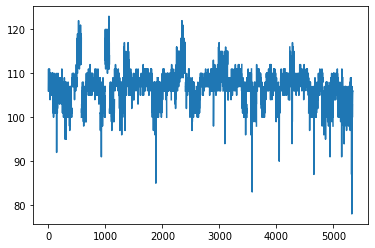

In [20]:
dfs = []
for label, curdf in cpudf.groupby('uuid'):
    curdf["cpuPercent"] = curdf.cpuUsr.diff().shift(-1)
    dfs.append(curdf)


cpupercentdf = pandas.concat(dfs).reset_index(drop=True)
cpupercentdf["startDateTime"] = (cpupercentdf["startTime"]/pow(10,3)).apply(datetime.fromtimestamp)
pyplot.plot(cpupercentdf.index, cpupercentdf["cpuPercent"])

In [16]:
metrics = df[["startTime","cpuUsr","network_rx_bytes.vinternal_1"]].copy()
metrics

,startTime,cpuUsr,network_rx_bytes.vinternal_1
33500,1639177900303,234614,1121248058
33501,1639177901605,234724,1121248058
33502,1639177902885,234832,1121248058
33503,1639177904144,234947,1121248058
33504,1639177905427,235055,1121248058
...,...,...,...
38598,1639178711255,303423,1116615893
38599,1639178712511,303532,1116615893
38600,1639178713731,303638,1116615893
38601,1639178714975,303745,1116615893


In [17]:
metrics["startDateTime"] = (metrics["startTime"]/pow(10,3)).apply(datetime.fromtimestamp)
metrics

,startTime,cpuUsr,network_rx_bytes.vinternal_1,startDateTime
33500,1639177900303,234614,1121248058,2021-12-10 23:11:40.303
33501,1639177901605,234724,1121248058,2021-12-10 23:11:41.605
33502,1639177902885,234832,1121248058,2021-12-10 23:11:42.885
33503,1639177904144,234947,1121248058,2021-12-10 23:11:44.144
33504,1639177905427,235055,1121248058,2021-12-10 23:11:45.427
...,...,...,...,...
38598,1639178711255,303423,1116615893,2021-12-10 23:25:11.255
38599,1639178712511,303532,1116615893,2021-12-10 23:25:12.511
38600,1639178713731,303638,1116615893,2021-12-10 23:25:13.731
38601,1639178714975,303745,1116615893,2021-12-10 23:25:14.975


In [18]:
timebins = []
current_datetime = start_datetime
while current_datetime <= end_datetime:
    timebins.append(current_datetime)
    current_datetime += timedelta(seconds=1)
timebins.append(end_datetime)

NameError: name 'start_datetime' is not defined

In [19]:
metrics["bins"] = pandas.cut(metrics["startDateTime"], timebins)
metrics

ValueError: bins must be of datetime64 dtype

In [15]:
for value in metrics.loc[0]:
    print(value)

1639145053510
5208
183793451
2021-12-10 14:04:13.510000
(2021-12-10 14:04:12.888000, 2021-12-10 14:04:13.888000]


In [16]:
for grouplabel, groupdf in metrics.groupby("bins"):
    #print(f"Label: {grouplabel}")
    print(f"Entries: {len(groupdf)}")
    #print(f"DataFrame: {groupdf}")

Entries: 67
Entries: 109
Entries: 172
Entries: 171
Entries: 146
Entries: 184
Entries: 206
Entries: 145
Entries: 119
Entries: 69
Entries: 69
Entries: 61
Entries: 70
Entries: 66
Entries: 27
Entries: 1


In [17]:
cpupercentdf["bins"] = pandas.cut(cpupercentdf["startDateTime"], timebins)
cpupercentdf

,uuid,startTime,endTime,cpuUsr,cpuPercent,startDateTime,bins
0,00f91454-67ce-44ad-88a0-94a3aac70e92,1639145053288,1639145053518,5557,111.0,2021-12-10 14:04:13.288,"(2021-12-10 14:04:12.888000, 2021-12-10 14:04:..."
1,00f91454-67ce-44ad-88a0-94a3aac70e92,1639145054520,1639145054775,5668,108.0,2021-12-10 14:04:14.520,"(2021-12-10 14:04:13.888000, 2021-12-10 14:04:..."
2,00f91454-67ce-44ad-88a0-94a3aac70e92,1639145055777,1639145056037,5776,111.0,2021-12-10 14:04:15.777,"(2021-12-10 14:04:14.888000, 2021-12-10 14:04:..."
3,00f91454-67ce-44ad-88a0-94a3aac70e92,1639145057038,1639145057296,5887,107.0,2021-12-10 14:04:17.038,"(2021-12-10 14:04:16.888000, 2021-12-10 14:04:..."
4,00f91454-67ce-44ad-88a0-94a3aac70e92,1639145058297,1639145058556,5994,109.0,2021-12-10 14:04:18.297,"(2021-12-10 14:04:17.888000, 2021-12-10 14:04:..."
...,...,...,...,...,...,...,...
1678,fd76c448-4515-4d90-a51e-bd5933fca4b1,1639145054340,1639145054517,2253,100.0,2021-12-10 14:04:14.340,"(2021-12-10 14:04:13.888000, 2021-12-10 14:04:..."
1679,fd76c448-4515-4d90-a51e-bd5933fca4b1,1639145055529,1639145055657,2353,103.0,2021-12-10 14:04:15.529,"(2021-12-10 14:04:14.888000, 2021-12-10 14:04:..."
1680,fd76c448-4515-4d90-a51e-bd5933fca4b1,1639145056658,1639145056823,2456,103.0,2021-12-10 14:04:16.658,"(2021-12-10 14:04:15.888000, 2021-12-10 14:04:..."
1681,fd76c448-4515-4d90-a51e-bd5933fca4b1,1639145057824,1639145057998,2559,106.0,2021-12-10 14:04:17.824,"(2021-12-10 14:04:16.888000, 2021-12-10 14:04:..."


In [18]:
for grouplabel, groupdf in cpupercentdf.groupby("bins"):
    #print(f"Label: {grouplabel}")
    print(f"Entries: {len(groupdf)}")
    #print(f"DataFrame: {groupdf}")

Entries: 67
Entries: 109
Entries: 172
Entries: 171
Entries: 146
Entries: 184
Entries: 206
Entries: 145
Entries: 119
Entries: 69
Entries: 69
Entries: 61
Entries: 70
Entries: 66
Entries: 27
Entries: 1


In [19]:
cpusumdf = metrics.groupby("bins").agg(cpu_sum=("cpuUsr","sum"), numlambdas=("cpuUsr","count")).reset_index()
cpusumdf

,bins,cpu_sum,numlambdas
0,"(2021-12-10 14:04:12.888000, 2021-12-10 14:04:...",148159,67
1,"(2021-12-10 14:04:13.888000, 2021-12-10 14:04:...",245806,109
2,"(2021-12-10 14:04:14.888000, 2021-12-10 14:04:...",407076,172
3,"(2021-12-10 14:04:15.888000, 2021-12-10 14:04:...",415505,171
4,"(2021-12-10 14:04:16.888000, 2021-12-10 14:04:...",383727,146
5,"(2021-12-10 14:04:17.888000, 2021-12-10 14:04:...",399875,184
6,"(2021-12-10 14:04:18.888000, 2021-12-10 14:04:...",435128,206
7,"(2021-12-10 14:04:19.888000, 2021-12-10 14:04:...",279681,145
8,"(2021-12-10 14:04:20.888000, 2021-12-10 14:04:...",191949,119
9,"(2021-12-10 14:04:21.888000, 2021-12-10 14:04:...",34342,69


In [20]:
cpusumdfpercent = cpupercentdf.groupby("bins").agg(cpu_sum=("cpuPercent","sum"), numlambdas=("cpuUsr","count")).reset_index()
cpusumdfpercent

,bins,cpu_sum,numlambdas
0,"(2021-12-10 14:04:12.888000, 2021-12-10 14:04:...",7104.0,67
1,"(2021-12-10 14:04:13.888000, 2021-12-10 14:04:...",11685.0,109
2,"(2021-12-10 14:04:14.888000, 2021-12-10 14:04:...",18377.0,172
3,"(2021-12-10 14:04:15.888000, 2021-12-10 14:04:...",18381.0,171
4,"(2021-12-10 14:04:16.888000, 2021-12-10 14:04:...",15684.0,146
5,"(2021-12-10 14:04:17.888000, 2021-12-10 14:04:...",17505.0,184
6,"(2021-12-10 14:04:18.888000, 2021-12-10 14:04:...",13484.0,206
7,"(2021-12-10 14:04:19.888000, 2021-12-10 14:04:...",9998.0,145
8,"(2021-12-10 14:04:20.888000, 2021-12-10 14:04:...",6951.0,119
9,"(2021-12-10 14:04:21.888000, 2021-12-10 14:04:...",7126.0,69


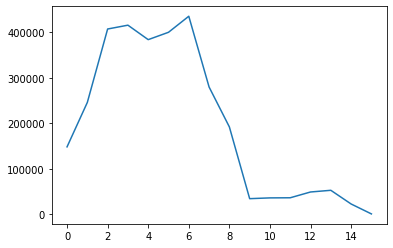

In [21]:
pyplot.plot(cpusumdf.index, cpusumdf["cpu_sum"])

<AxesSubplot:>

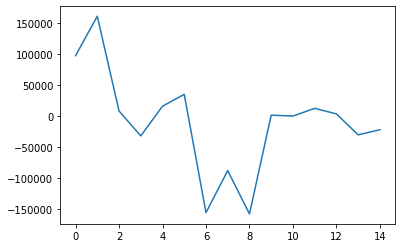

In [22]:
cpusumdf.cpu_sum.diff().shift(-1).plot()

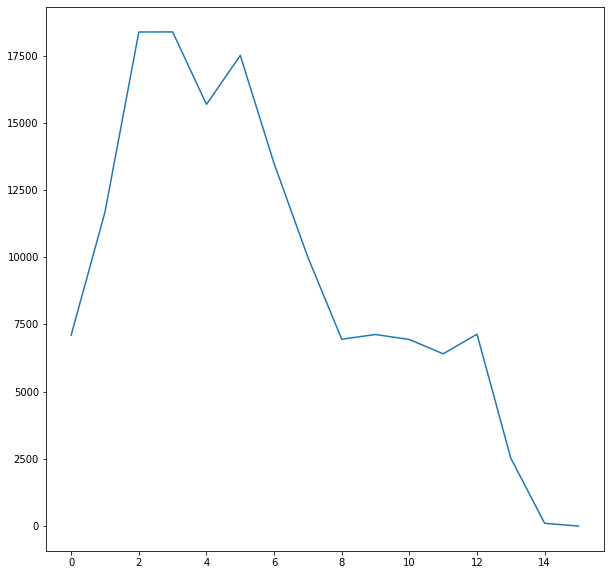

In [23]:
pyplot.figure(figsize=(10,10))
pyplot.plot(cpusumdfpercent["cpu_sum"], label="CPU Usage")

<AxesSubplot:>

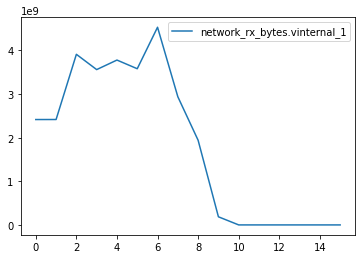

In [24]:
networksumdf = metrics[["bins","network_rx_bytes.vinternal_1"]].groupby("bins").sum().reset_index()
networksumdf.plot()

In [25]:
networkcumsumdf = metrics[["bins","network_rx_bytes.vinternal_1"]].groupby("bins").sum().cumsum().reset_index()
networkcumsumdf

,bins,network_rx_bytes.vinternal_1
0,"(2021-12-10 14:04:12.888000, 2021-12-10 14:04:...",2416620826
1,"(2021-12-10 14:04:13.888000, 2021-12-10 14:04:...",4834004394
2,"(2021-12-10 14:04:14.888000, 2021-12-10 14:04:...",8746541175
3,"(2021-12-10 14:04:15.888000, 2021-12-10 14:04:...",12308682790
4,"(2021-12-10 14:04:16.888000, 2021-12-10 14:04:...",16089485534
5,"(2021-12-10 14:04:17.888000, 2021-12-10 14:04:...",19671369555
6,"(2021-12-10 14:04:18.888000, 2021-12-10 14:04:...",24204709215
7,"(2021-12-10 14:04:19.888000, 2021-12-10 14:04:...",27144196372
8,"(2021-12-10 14:04:20.888000, 2021-12-10 14:04:...",29085373459
9,"(2021-12-10 14:04:21.888000, 2021-12-10 14:04:...",29271725822


<AxesSubplot:>

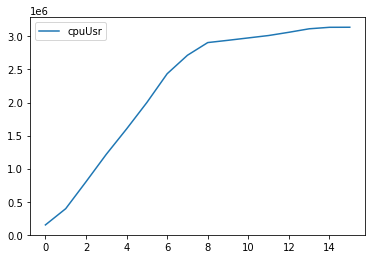

In [26]:
cpucumsumdf = metrics[["bins","cpuUsr"]].groupby("bins").sum().cumsum().reset_index()
cpucumsumdf.plot()

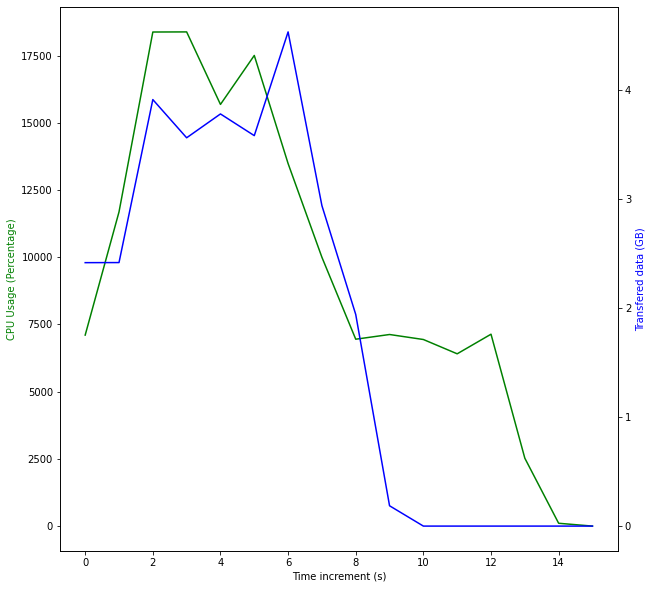

In [27]:
fig,ax = pyplot.subplots(figsize=(10,10))
ax.plot(cpusumdfpercent["cpu_sum"], color="green")
ax.set_ylabel("CPU Usage (Percentage)", color="green")
ax2 = ax.twinx()
ax2.plot(networksumdf["network_rx_bytes.vinternal_1"]/pow(10,9), color="blue")
ax2.set_ylabel("Transfered data (GB)", color="blue")
ax.set_xlabel("Time increment (s)")
fig.savefig('cpuandnetwork.png',
            format='png',
            dpi=300,
            bbox_inches='tight')

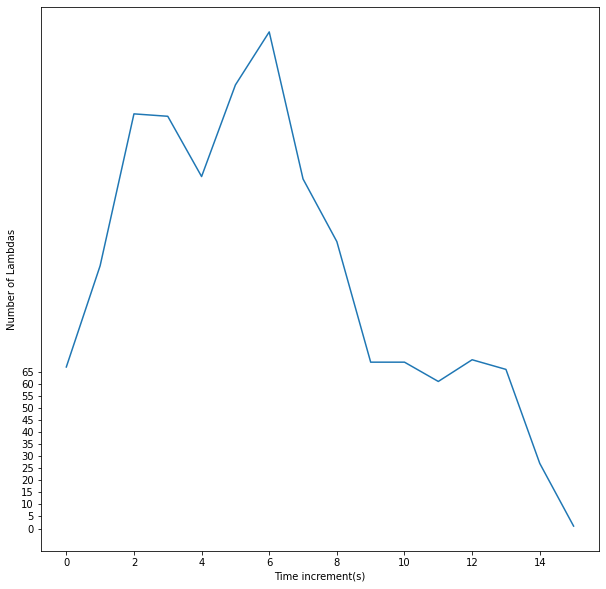

In [28]:
fig,ax = pyplot.subplots(figsize=(10,10))
ax.plot(cpusumdfpercent["numlambdas"])
pyplot.yticks(list(range(0,70,5)))
pyplot.xlabel("Time increment(s)")
pyplot.ylabel("Number of Lambdas")
fig.savefig('numlambdas.png',
            format='png',
            dpi=300,
            bbox_inches='tight')

In [84]:
# grupy_czas_wykonania = [
# grupa = df.groupby("uuid")[0]
# grupa_poczatek = grupa["startTime"].min()
# grupa_koniec = grupa["endTime"].max()
# grupa_czas_trwania = grupa_koniec - grupa_poczatek
# grupa_czas_trwania
# ]

In [97]:
hihi_array=[]
for (label,grupa) in df.groupby("uuid"):
    startTime=grupa["startTime"].min()
    #.loc[grupa.index[0],"startTime"]
    endTime=grupa["endTime"].max()
    hihi_array.append(endTime-startTime)
hihi_array=sorted(hihi_array)
hihi_array

[43360,
 44580,
 44617,
 44689,
 44751,
 44805,
 44978,
 45249,
 45268,
 45290,
 45324,
 45419,
 45441,
 45719,
 45769,
 45772,
 45798,
 45866,
 45873,
 45878,
 45892,
 45895,
 45922,
 45939,
 45946,
 45948,
 45955,
 45989,
 46002,
 46034,
 46061,
 46073,
 46118,
 46121,
 46127,
 46152,
 46197,
 46207,
 46242,
 46280,
 46309,
 46353,
 46369,
 46385,
 46417,
 46445,
 46461,
 46482,
 46486,
 46491,
 46503,
 46515,
 46569,
 46592,
 46621,
 46860,
 46921,
 46925,
 46942,
 46949,
 46959,
 46963,
 47015,
 47034,
 47039,
 47065,
 47071,
 47102,
 47107,
 47118,
 47143,
 47152,
 47179,
 47183,
 47232,
 47235,
 47245,
 47248,
 47256,
 47266,
 47306,
 47307,
 47387,
 47436,
 47439,
 47486,
 47510,
 47557,
 47564,
 47663,
 47668,
 47680,
 47970,
 47984,
 48207,
 48210,
 48314,
 48315,
 48401,
 48411,
 48415,
 48417,
 48488,
 48503,
 48594,
 48608,
 48631,
 48879,
 49070,
 49311,
 49335,
 49352,
 49423,
 49435,
 49462,
 49500,
 49543,
 49692,
 49698,
 49828,
 50328,
 50374,
 50395,
 50603,
 51098,


In [98]:
hihi_array=[el/1000 for el in hihi_array]

(array([ 1.,  9., 30., 40., 16., 13., 11.,  5.,  1.,  2.]),
 array([43.36  , 44.3391, 45.3182, 46.2973, 47.2764, 48.2555, 49.2346,
        50.2137, 51.1928, 52.1719, 53.151 ]),
 <BarContainer object of 10 artists>)

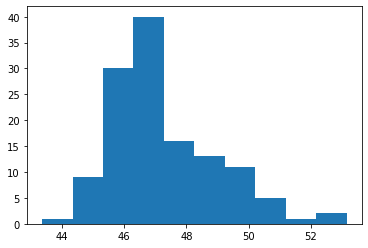

In [99]:
pyplot.hist(hihi_array)#, bins=range(30,75,5))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc8dfa360a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc8dfa36520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc8dfa29d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc8dfa36ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc8dfa36d90>],
 'means': []}

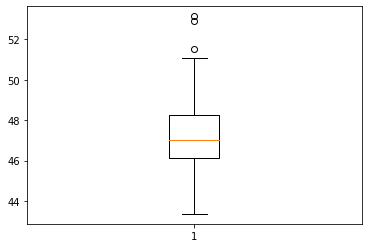

In [100]:
pyplot.boxplot(hihi_array)

In [34]:
[0,..10000..,70000]
[10000]

SyntaxError: invalid syntax (559371099.py, line 1)

<AxesSubplot:xlabel='startTime'>

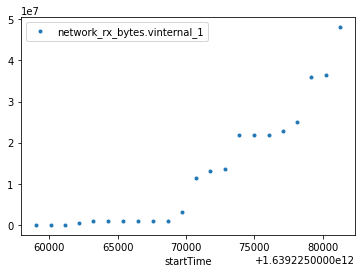

In [182]:
# [0].plot(x="startTime",y="network_rx_bytes.vinternal_1", style=".")
# x = np.linspace(0,50,35)
# y = np.random.exponential(1, len(x))
# y2 = np.random.exponential(1, len(x))

In [222]:
network_df = pandas.read_csv("../exclusive-dilep/scaling_network_bound_3.csv")
network_df['network_rx_bytes.vinternal_1'] = network_df['network_rx_bytes.vinternal_1'].astype(int)

partitions=128
reduced_network_df= network_df[network_df["partitions"]==partitions]
reduced_network_df

,measurementID,version,lang,startTime,uuid,newcontainer,vmuptime,platform,containerID,functionName,...,vmcpusteal,contextSwitches,frameworkRuntime,runtime,endTime,network_rx_bytes.vinternal_1,network_rx_bytes.telemetry1_sb,network_rx_bytes.vtarget_1,network_rx_bytes.lo,partitions
16317,0,0.5,python,1639232819723,8c4668a8-07c6-4f14-8ace-78a3fba4baeb,0,1639226079,AWS Lambda,2021/12/11/[$LATEST]2cc27529079b404fbb4ac868d4...,root_lambda,...,75,73929,157,157,1639232819880,155658147,180,0,102509,128
16318,1,0.5,python,1639232820882,8c4668a8-07c6-4f14-8ace-78a3fba4baeb,0,1639226079,AWS Lambda,2021/12/11/[$LATEST]2cc27529079b404fbb4ac868d4...,root_lambda,...,75,74631,87,87,1639232820969,155661053,180,0,102509,128
16319,2,0.5,python,1639232821970,8c4668a8-07c6-4f14-8ace-78a3fba4baeb,0,1639226079,AWS Lambda,2021/12/11/[$LATEST]2cc27529079b404fbb4ac868d4...,root_lambda,...,75,75325,202,202,1639232822172,157465564,180,0,102509,128
16320,3,0.5,python,1639232823174,8c4668a8-07c6-4f14-8ace-78a3fba4baeb,0,1639226079,AWS Lambda,2021/12/11/[$LATEST]2cc27529079b404fbb4ac868d4...,root_lambda,...,76,75839,179,179,1639232823353,157465564,180,0,102509,128
16321,4,0.5,python,1639232824355,8c4668a8-07c6-4f14-8ace-78a3fba4baeb,0,1639226079,AWS Lambda,2021/12/11/[$LATEST]2cc27529079b404fbb4ac868d4...,root_lambda,...,76,76854,195,195,1639232824550,168472714,180,0,102509,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21893,32,0.5,python,1639232856279,a7b85da6-8c9f-48a6-a5d7-f1fcc32cb131,0,1639230543,AWS Lambda,2021/12/11/[$LATEST]2b612dae22ae4dd194fe06fe5a...,root_lambda,...,32,73195,94,94,1639232856373,264358653,180,0,91408,128
21894,33,0.5,python,1639232857374,a7b85da6-8c9f-48a6-a5d7-f1fcc32cb131,0,1639230543,AWS Lambda,2021/12/11/[$LATEST]2b612dae22ae4dd194fe06fe5a...,root_lambda,...,32,73780,179,179,1639232857553,269089767,180,0,91408,128
21895,34,0.5,python,1639232858555,a7b85da6-8c9f-48a6-a5d7-f1fcc32cb131,0,1639230543,AWS Lambda,2021/12/11/[$LATEST]2b612dae22ae4dd194fe06fe5a...,root_lambda,...,32,74554,161,161,1639232858716,279509275,180,0,91408,128
21896,35,0.5,python,1639232859718,a7b85da6-8c9f-48a6-a5d7-f1fcc32cb131,0,1639230543,AWS Lambda,2021/12/11/[$LATEST]2b612dae22ae4dd194fe06fe5a...,root_lambda,...,33,75069,199,199,1639232859917,279509275,180,0,91408,128


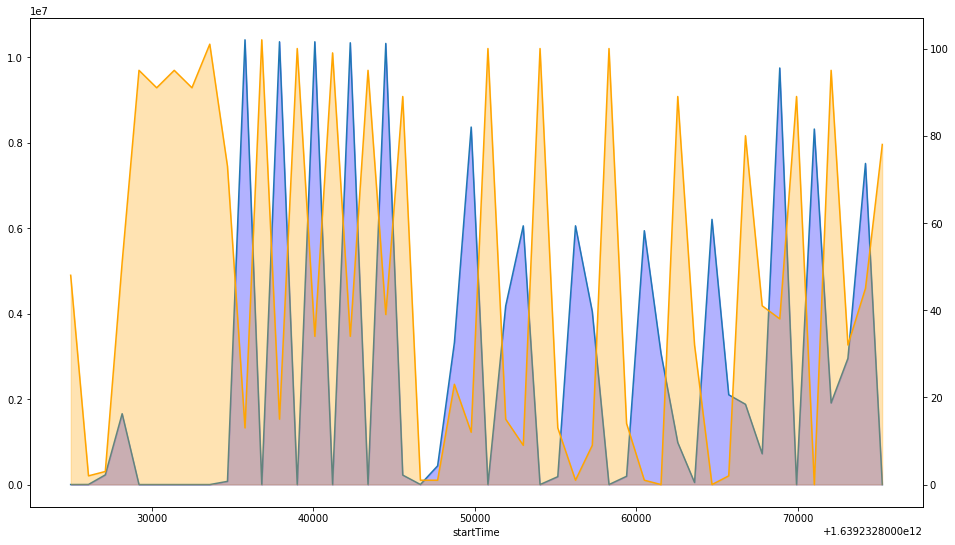

In [252]:
hihi=list(reduced_network_df.groupby('uuid'))[5][0]
tmp_df=reduced_network_df[reduced_network_df['uuid']==hihi].set_index('startTime')

fig, ax = pyplot.subplots(figsize=(16,9))
first_plot=tmp_df[
    'network_rx_bytes.vinternal_1'
].diff().shift(-1)
first_plot.plot(ax=ax, x='startTime', y='network_rx_bytes.vinternal_1', label=label)

ax.fill_between(first_plot.index, first_plot, color='blue', alpha=0.3)

ax2 = ax.twinx()

second_plot=tmp_df.cpuUsr.diff().shift(-1)
second_plot.plot(ax=ax2, x='startTime', label=label, color="orange")
ax2.fill_between(second_plot.index, second_plot, color='orange', alpha=0.3)


In [247]:
fig.savefig(f'network_cpu_intervals_plot_{partitions}.pdf')  

In [240]:
tmp_df

,measurementID,version,lang,startTime,uuid,newcontainer,vmuptime,platform,containerID,functionName,...,vmcpusteal,contextSwitches,frameworkRuntime,runtime,endTime,network_rx_bytes.vinternal_1,network_rx_bytes.telemetry1_sb,network_rx_bytes.vtarget_1,network_rx_bytes.lo,partitions
17983,0,0.5,python,1639232819742,047017c8-1470-4bfb-9b94-19b481b122ee,0,1639226162,AWS Lambda,2021/12/11/[$LATEST]23e7b543a3fe4914ab472a5298...,root_lambda,...,63,72691,167,167,1639232819909,149095246,266,0,100583,128
17984,1,0.5,python,1639232820910,047017c8-1470-4bfb-9b94-19b481b122ee,0,1639226162,AWS Lambda,2021/12/11/[$LATEST]23e7b543a3fe4914ab472a5298...,root_lambda,...,63,73392,89,89,1639232820999,149098156,266,0,100583,128
17985,2,0.5,python,1639232822000,047017c8-1470-4bfb-9b94-19b481b122ee,0,1639226162,AWS Lambda,2021/12/11/[$LATEST]23e7b543a3fe4914ab472a5298...,root_lambda,...,63,74037,86,86,1639232822086,150806810,266,0,100583,128
17986,3,0.5,python,1639232823088,047017c8-1470-4bfb-9b94-19b481b122ee,0,1639226162,AWS Lambda,2021/12/11/[$LATEST]23e7b543a3fe4914ab472a5298...,root_lambda,...,63,74571,192,192,1639232823280,151031841,266,0,100583,128
17987,4,0.5,python,1639232824281,047017c8-1470-4bfb-9b94-19b481b122ee,0,1639226162,AWS Lambda,2021/12/11/[$LATEST]23e7b543a3fe4914ab472a5298...,root_lambda,...,63,75214,83,83,1639232824364,159305397,266,0,100583,128
17988,5,0.5,python,1639232825366,047017c8-1470-4bfb-9b94-19b481b122ee,0,1639226162,AWS Lambda,2021/12/11/[$LATEST]23e7b543a3fe4914ab472a5298...,root_lambda,...,64,75878,214,214,1639232825580,161211181,266,0,100583,128
17989,6,0.5,python,1639232826582,047017c8-1470-4bfb-9b94-19b481b122ee,0,1639226162,AWS Lambda,2021/12/11/[$LATEST]23e7b543a3fe4914ab472a5298...,root_lambda,...,64,76609,188,188,1639232826770,171358474,266,0,100583,128
17990,7,0.5,python,1639232827772,047017c8-1470-4bfb-9b94-19b481b122ee,0,1639226162,AWS Lambda,2021/12/11/[$LATEST]23e7b543a3fe4914ab472a5298...,root_lambda,...,64,77281,88,89,1639232827861,171752730,266,0,100583,128
17991,8,0.5,python,1639232828862,047017c8-1470-4bfb-9b94-19b481b122ee,0,1639226162,AWS Lambda,2021/12/11/[$LATEST]23e7b543a3fe4914ab472a5298...,root_lambda,...,64,77995,204,204,1639232829066,181271483,266,0,100583,128
17992,9,0.5,python,1639232830068,047017c8-1470-4bfb-9b94-19b481b122ee,0,1639226162,AWS Lambda,2021/12/11/[$LATEST]23e7b543a3fe4914ab472a5298...,root_lambda,...,64,78678,92,93,1639232830161,186891075,266,0,100583,128
